# Resampling DateTime Data
Author: Kim Hazed Delfino

## Imports 

In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Load the Data

In [255]:
path = r"C:\Users\kdelfino\Documents\GitHub\Resampling-DateTime-Data\london_weather_MODIFIED - london_weather_MODIFIED.csv"
df = pd.read_csv(path)
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


## Convert the date column to datetime dtype

In [256]:
# Convert date col to dtype datetime with format Y-m-d
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

In [257]:
# Set datetime as index
df = df.set_index('date')
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


In [258]:
columns_to_keep = ['precipitation',
                    'mean_temp',
                    'min_temp',
                    'max_temp',
                    'snow_depth']

In [259]:
# keep only year 2000 or later and columns to keep
df = df.loc['2000':,columns_to_keep]
df


,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


## Missing Values

In [260]:
# Check for missing values
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

- Looks like we have quite a lot of missing values, Let's see what imputation method is best for each feature

In [261]:
df.sample(10)

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2001-04-20,0.2,5.6,2.2,10.9,0.0
2005-06-23,0.0,23.5,15.9,31.1,0.0
2004-01-26,0.0,3.4,1.3,5.3,0.0
2001-08-30,4.8,17.9,15.8,19.0,0.0
2007-10-26,0.0,NaN,8.8,12.5,0.0
2020-11-04,0.0,6.7,1.1,12.4,NaN
2016-03-24,8.0,8.2,5.0,15.1,0.0
2002-02-05,1.6,10.1,7.4,9.7,0.0
2015-07-26,5.6,15.6,12.1,20.9,0.0


- Precipitation and snow_depth looks like consists mostly with 0.0 or <1 values so it would make more sense to use the .fillna(0) method on those columns
- mean,min,max_temps however, have wide range of temparature so we can use interpolate method to fill all the missing values.

In [262]:
# Fill missing values with interpolate 
df['mean_temp'] = df['mean_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()

# Fill precipitation/snow_depth with 0
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)

# Double check 
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

## Answering Stakeholder Questions with Visualizations

### Q1: What month had the most precipitation between 2000 through 2010?

In [263]:
# Create subset for 2000-2010 with just precipitation
ts = df.loc[:'2010-12','precipitation'].copy()
ts

date
2000-01-01    0.0
2000-01-02    0.2
2000-01-03    6.0
2000-01-04    0.2
2000-01-05    0.8
             ... 
2010-12-27    5.0
2010-12-28    0.4
2010-12-29    1.4
2010-12-30    0.0
2010-12-31    0.0
Name: precipitation, Length: 4018, dtype: float64

In [264]:
# Resampling from Daily to Monthly and get avg value of each month
ts_month = ts.resample('M').mean().dropna()
ts.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2010-12-22', '2010-12-23', '2010-12-24', '2010-12-25',
               '2010-12-26', '2010-12-27', '2010-12-28', '2010-12-29',
               '2010-12-30', '2010-12-31'],
              dtype='datetime64[ns]', name='date', length=4018, freq=None)

In [265]:
ts_month.head()

date
2000-01-31    0.461290
2000-02-29    2.144828
2000-03-31    0.432258
2000-04-30    2.393333
2000-05-31    2.206452
Freq: M, Name: precipitation, dtype: float64

In [266]:
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

### Custom Function to plot time series

In [267]:
def ts_ploter(ts,title,
              ylabel,
              minor_locator,minor_format,
              major_locator,major_format,
              answer):
    ''' 
    ts : Time Series 
    title : Title of your plot
    minor_locator : minor tick locator 
        exp : mdates.MonthLocator(interval=3)
    minor_format : minor tick format
        exp : mdates.DateFormatter("%b")
    major_locator : major tick locator
        exp : mdates.YearLocator()
    major_format : major tick format
        exp : mdates.DateFormatter("%Y")
    '''
    # Plot figure
    fig, ax = plt.subplots(figsize=(12,3))

    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontsize='large',
                       fontweight='bold' ) 
    # customize minor ticks
    ax.xaxis.set_minor_locator(minor_locator)
    ax.xaxis.set_minor_formatter(minor_format)
    # customize major ticks
    ax.xaxis.set_major_locator(major_locator)
    ax.xaxis.set_major_formatter(major_format)
    # Making major/minor gridlines visually distinct
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    ts.plot(ax=ax,title=title,marker='',lw=1)
    ax.vlines(answer,ts.min(),ts.max(),
              colors='k',linestyles='dashed')
    ax.set_ylabel(ylabel)
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax;

In [268]:
## creating our tick locators and formatters
## for minor month ticks
# create the locator to place ticks every 3 months.
minor_locator = mdates.MonthLocator(interval=3)
minor_format = mdates.DateFormatter("%b")
## for major year ticks
major_locator = mdates.YearLocator()
major_format = mdates.DateFormatter("%Y")

In [269]:
# Get date of higest precipitation
ts_date = ts_month.idxmax()
ts_date

Timestamp('2009-11-30 00:00:00', freq='M')

In [270]:
# Get highest precipitation
ts_month.loc[ts_date]

4.613333333333333

(<Figure size 1200x300 with 1 Axes>,
 <AxesSubplot: title={'center': 'Precipitation for 2000-2010'}, xlabel='date', ylabel='Inches'>)

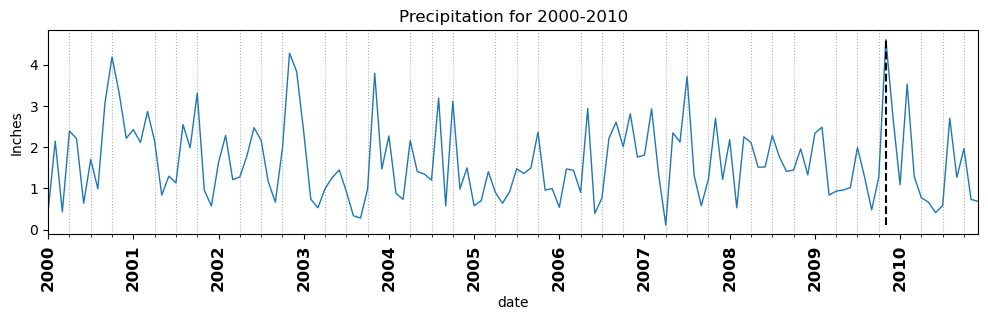

In [271]:
# Plot answer for Q1 
title = 'Precipitation for 2000-2010'
ylabel= 'Inches'
ts_ploter(ts_month,title,ylabel,minor_locator,minor_format,
          major_locator,major_format,ts_date)

#### Answering Q1:
- Q1: What month had the most precipitation between 2000 through 2010?
    - Highest precipitation recorded between 2000 and 2010 was on the month of `November` with Avg Precipitation of `4.61 Inches` thoughout the month 

### Q2: Which year between 2000-2020 had the coolest average temperature?

In [272]:
# Create subset for 2000-2020 with just mean_temp
ts_q2 = df.loc[:'2020-12','mean_temp'].copy()
ts_q2

date
2000-01-01    7.0
2000-01-02    7.9
2000-01-03    9.4
2000-01-04    7.0
2000-01-05    6.4
             ... 
2020-12-27    7.5
2020-12-28    1.1
2020-12-29    2.6
2020-12-30    2.7
2020-12-31   -0.8
Name: mean_temp, Length: 7671, dtype: float64

In [273]:
# Resampling by year and get avg value per month
ts_q2 = ts_q2.resample('A').mean()
ts_q2.index

DatetimeIndex(['2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31'],
              dtype='datetime64[ns]', name='date', freq='A-DEC')

In [274]:
## creating our tick locators and formatters
## for minor month ticks
# create the locator to place ticks every 3 months.
minor_locator = mdates.YearLocator()
minor_format = mdates.DateFormatter("%Y")
## for major year ticks
major_locator = mdates.YearLocator(5)
major_format = mdates.DateFormatter("%Y")

In [275]:
# Get date of coldest average temparature
ts_date = ts_q2.idxmin()
ts_date

Timestamp('2010-12-31 00:00:00', freq='A-DEC')

In [276]:
# Get the coldest average temparature
ts_q2.loc[ts_date]

10.657397260273973

(<Figure size 1200x300 with 1 Axes>,
 <AxesSubplot: title={'center': 'Average Temparature'}, xlabel='date', ylabel='Degrees'>)

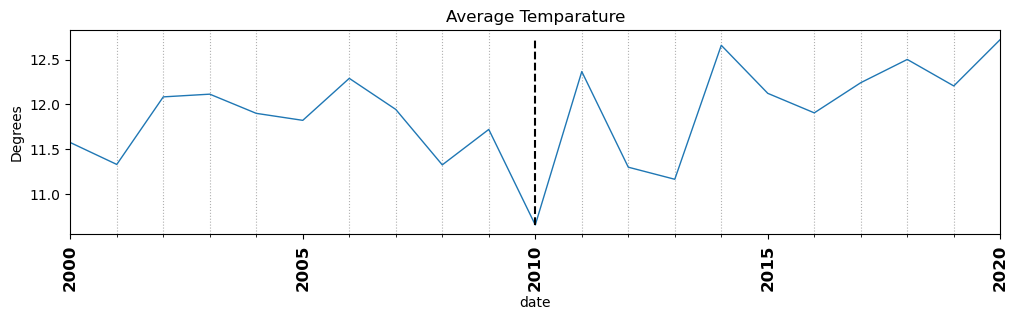

In [277]:
# Plot time series
title = "Average Temparature"
ylabel = "Degrees"
ts_ploter(ts_q2,title,ylabel,minor_locator,minor_format,
          major_locator,major_format,ts_date)

#### Answering Q2:
- Q2: Which year between 2000-2020 had the coolest average temperature?
    - The Coldest year between 2000-2020 happend on year `2010` with average temparature of `10.65 Degrees`